In [2]:
include("../src/Julia.jl")

parseCPPData (generic function with 1 method)

In [8]:
data = []

graphFolder = "../../graphs/"
allGraphs = ["rand_1000_u1000",
"rand_1000_iu1000",
"grid2_10000_u1000",
"grid2_10000_iu1000",
"randdense_1000_u1000",
"randdense_1000_iu1000",
"grid3_27000_u1000",
    "grid3_27000_u1000"];
# "pathDisjoint_1000_exp20"];

In [9]:
data = []

for graph in allGraphs
    
    println(graph)
    
    A = readFromFile(graphFolder * graph * "/graph.mtx");
    tree = readFromFile(graphFolder * graph * "/tree1.mtx")
    
    # make sure tree is weighted properly
    needReweighing = false
    
    u,v,w = findnz(tree)
    for i in 1:length(u)
        if tree[u[i], v[i]] != A[u[i], v[i]]
            needReweighing = true
        end
        
        tree[u[i], v[i]] = A[u[i], v[i]]
    end
    
    if needReweighing
        println("tree had bad weights - fixed now")
    end
    
    
    stretch = compStretches(tree, A);
    S = sum(stretch.nzval);
    
    println("log stretch is ", log(S))
    
    for precision in ["default", "64", "128", "256", "512", "1024"]
        logName = graphFolder * graph * "/_log_julia_tree1_" * precision * ".txt"
        logNorm = parseData(logName, only2=true)
        
        # most graphs seem to have 1000 iters - pathDisjoint_1000 only has 300
        for iter in [100, 200, 300, 500, 1000]
            try
                expectedS = iter / log(1 / logNorm[iter])

                # the above should be S^(1/3) - in theory. So, let's cube it up
                expectedS = expectedS^3

                push!(data, (S, expectedS, precision, iter))
            catch
                # skip what we can
            end
        end
    end
    
    println("\n")
end

rand_1000_u1000
log stretch is 11.16573764151685


rand_1000_iu1000
log stretch is 10.54239303397516


grid2_10000_u1000
log stretch is 12.388025142371605


grid2_10000_iu1000
log stretch is 12.27207877016643


randdense_1000_u1000
log stretch is 13.068262697426947


randdense_1000_iu1000
log stretch is 11.249101842688985


grid3_27000_u1000
log stretch is 14.21114178759437


grid3_27000_u1000
log stretch is 14.21114178759437




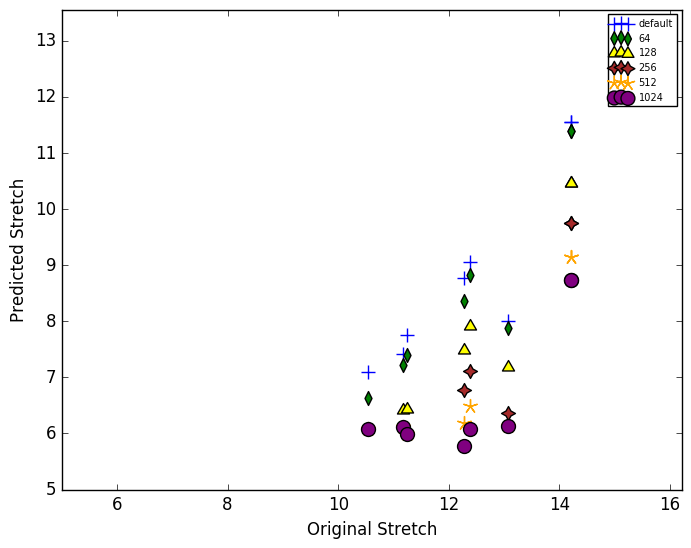

PyObject <matplotlib.text.Text object at 0x329537f10>

In [35]:
# let's do a plot now
# say, for 300 iterations

color = ["blue", "green", "yellow", "brown", "orange", "purple"]
markers = ["+", (2,1), (3,1), (4,1), (5,2), (4,3)]

maxx = 0
maxy = 0

ind = 0
for precision in ["default", "64", "128", "256", "512", "1024"]
    ind = ind + 1
    
    origS = Array{Float64,1}(0)
    myS = Array{Float64,1}(0)
    
    for dat in data
        if dat[3] == precision && dat[4] == 300
            push!(origS, dat[1])
            push!(myS, dat[2])
        end
    end
    
    maxx = max(maxx, maximum(origS))
    maxy = max(maxy, maximum(myS))
    
    scatter(log(origS), log(myS), label=precision, s = 100, c=color[ind], marker=markers[ind])
end

maxx = log(maxx) + 2
maxy = log(maxy) + 2

xlim([5, maxx])
ylim([5, maxy])

legend(fontsize=7)
ylabel("Predicted Stretch")
xlabel("Original Stretch")

# savefig(ipmFolder * "convergencePlot.png")

# PyPlot.clf()